In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('train.csv')

In [3]:
eval_cons = pd.DataFrame(columns=['bid_base','Imps','spend','clicks'])

max_num = 0
max_bid = 0
spend = 0
best = 0
iteration = 0

for bid_base in np.arange(3,300,2):
    num_click = 0
    flag = True
    Imps = 0
    spend = 0
    iteration += 1
    for i in range(train.shape[0]):
        bid = bid_base
        
        if bid >= train.payprice[i] and flag:
            spend = spend + train.payprice[i]
            if spend > 6250000:
                spend = spend - train.payprice[i]
                flag = False
                break
            num_click = num_click + train.click[i]
            Imps = Imps + 1
    eval_cons.loc[iteration,'bid_base'] = bid_base
    eval_cons.loc[iteration,'clicks'] = num_click
    eval_cons.loc[iteration,'spend'] = spend/1000
    eval_cons.loc[iteration,'Imps'] = Imps
    
    if num_click > max_num:
        max_num  = num_click
        max_bid = bid_base
        best = bid_base
        
eval_cons['CTR'] = eval_cons['clicks']/eval_cons['Imps']
eval_cons['eCPC'] = eval_cons['spend']/eval_cons['clicks']
eval_cons['CPM'] = eval_cons['spend']*1000/eval_cons['Imps']

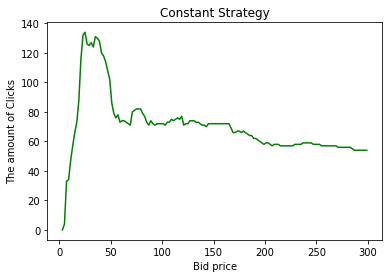

In [6]:
first_line = eval_cons[['bid_base','clicks']].astype(float)
fig, ax1 = plt.subplots()
ax1.plot(first_line.bid_base,first_line.clicks, color='g')
ax1.set_xlabel('Bid price')
ax1.set_ylabel('The amount of Clicks')

plt.title("Constant Strategy")
plt.savefig('constant.png',dpi = 300)
plt.show()

In [8]:
eval_cons

,bid_base,Imps,spend,clicks,CTR,eCPC,CPM
1,3,6987,11.437,0,0,inf,1.6369
2,5,62513,278.672,4,6.39867e-05,69.668,4.45782
3,7,89241,451.209,33,0.000369785,13.673,5.05607
4,9,109676,625.181,34,0.000310004,18.3877,5.70025
5,11,147845,1023.8,47,0.000317901,21.7831,6.92485
6,13,174148,1351.84,57,0.000327308,23.7165,7.76261
7,15,198827,1709.54,66,0.000331947,25.902,8.5981
8,17,235737,2319.37,73,0.000309667,31.7722,9.8388
9,19,266026,2876.96,88,0.000330795,32.6927,10.8146
10,21,404426,5675.23,116,0.000286826,48.9244,14.0328
